Mount Google Drive and Extract Data

In [1]:
from google.colab import drive

import os
import zipfile

drive.mount('/content/drive')
print("-------> GoogleDrive is Mounted! <-------")


local_zip ='/content/drive/MyDrive/flight_prediction_dataset.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/')
zip_ref.close()

print("-------> DataSet is unziped! <-------")

Mounted at /content/drive
-------> GoogleDrive is Mounted! <-------
-------> DataSet is unziped! <-------


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
train_data = pd.read_excel(r"/content/Data_Train.xlsx")
test_data = pd.read_excel(r"/content/Test_set.xlsx")

In [4]:
train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

In [5]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
test_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB


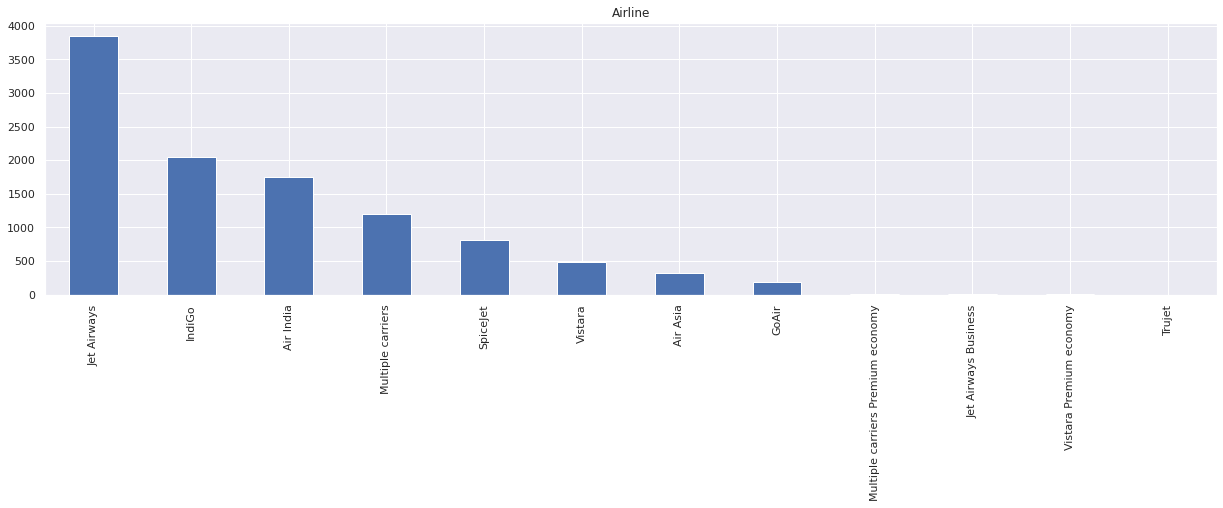

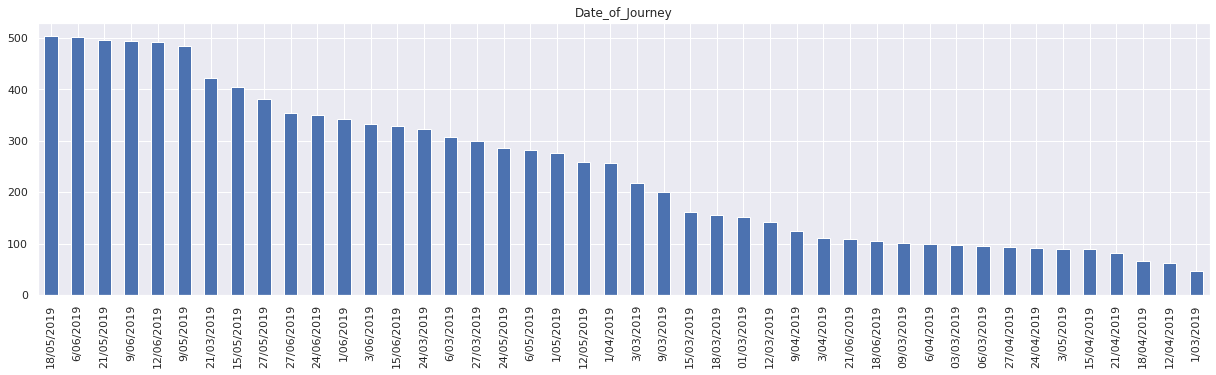

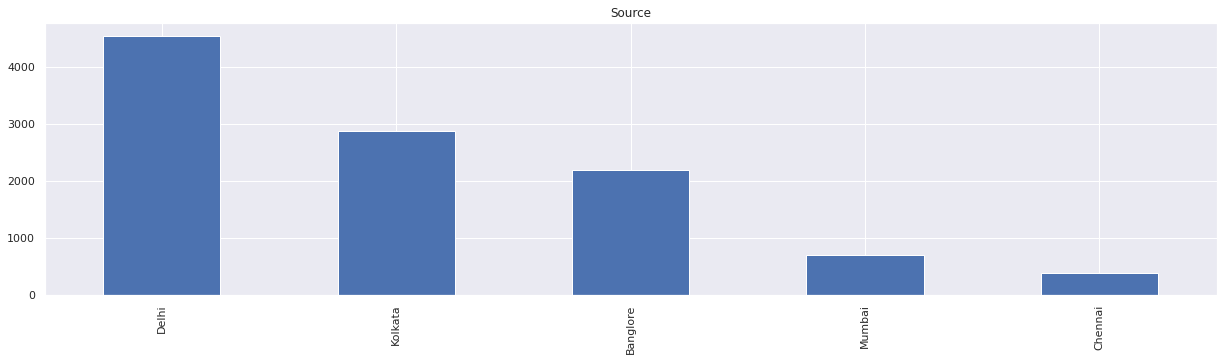

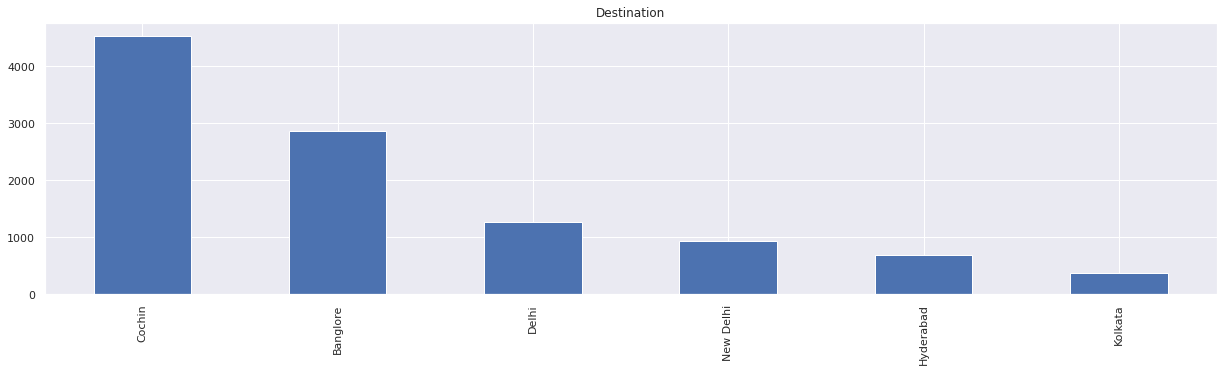

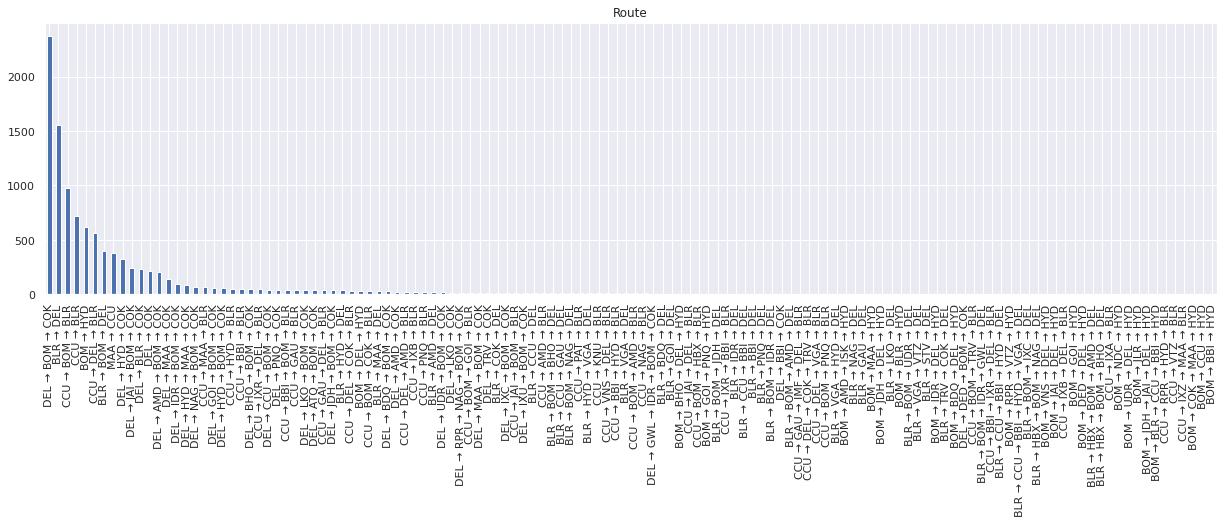

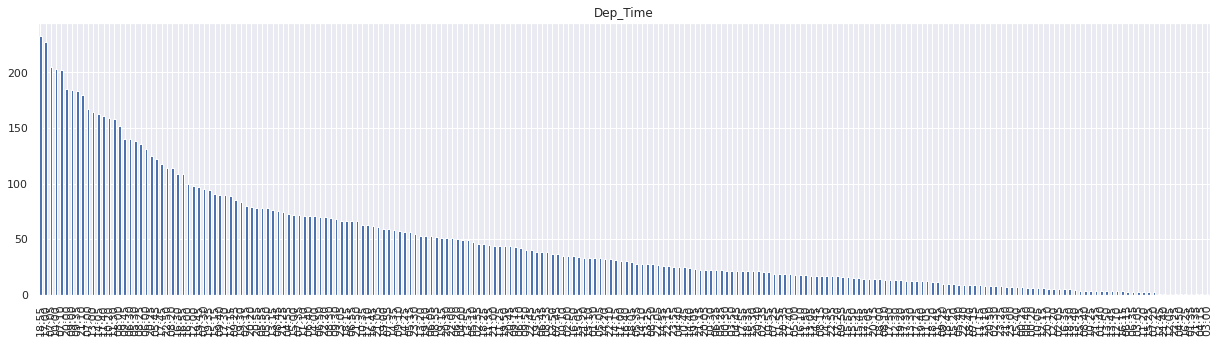

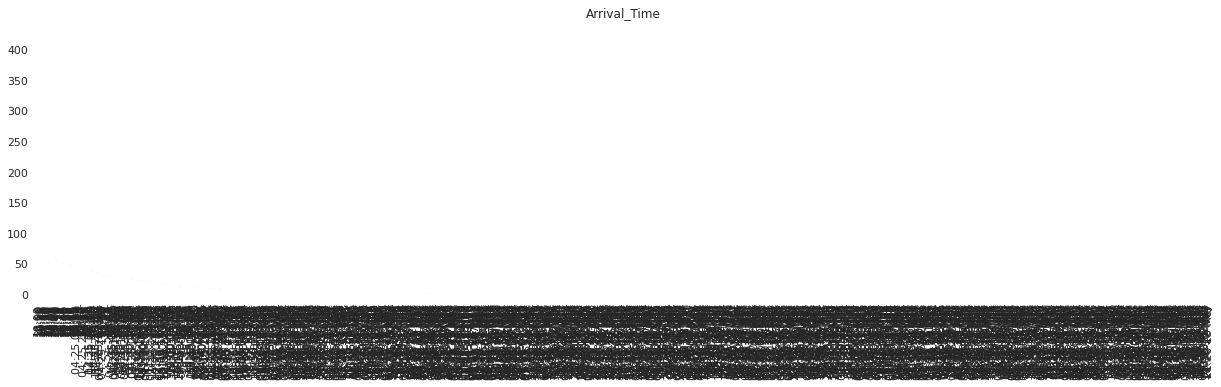

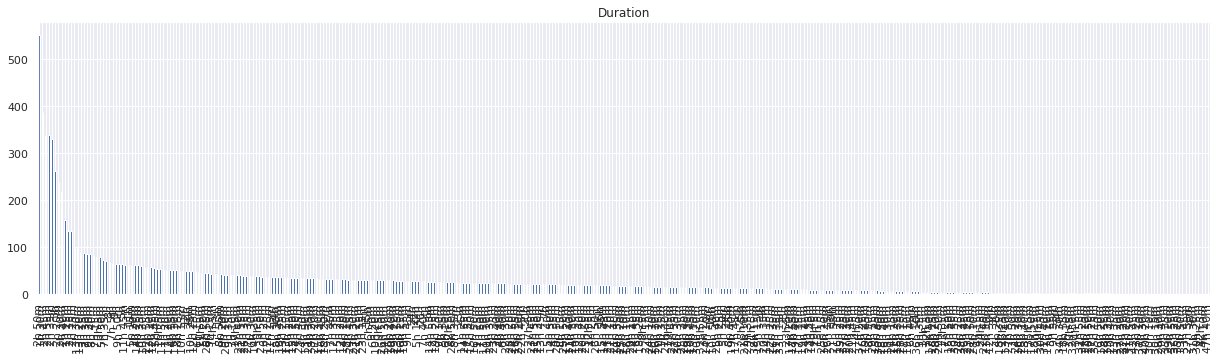

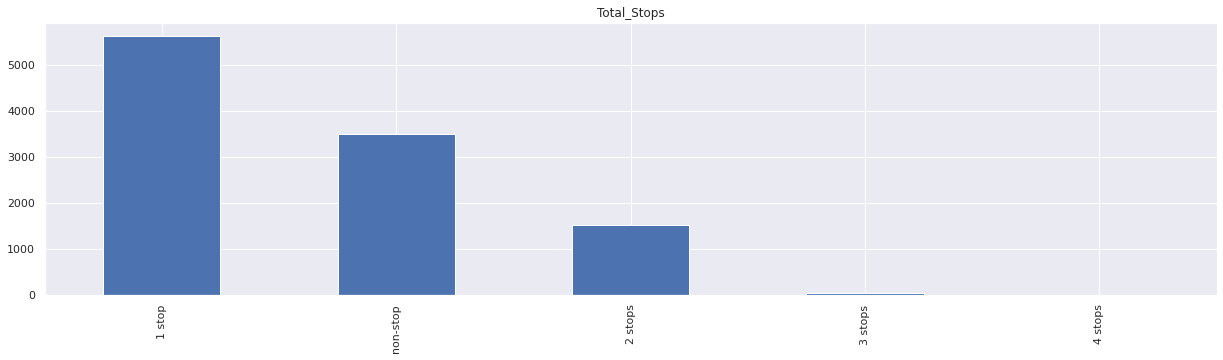

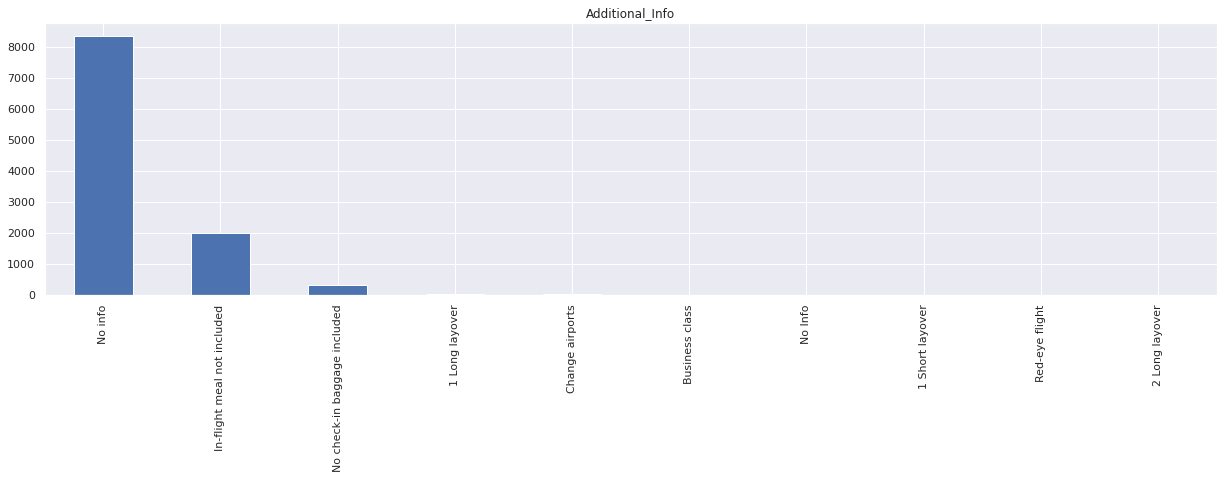

In [ ]:
#inivariate analyis
#Selecting tge categorical columns
categorical_col = train_data.select_dtypes(include=['object']).columns

#Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
  plt.figure(figsize=(21,5))
  plt.subplot(111)
  train_data[column].value_counts().plot(kind='bar')
  plt.title(column)

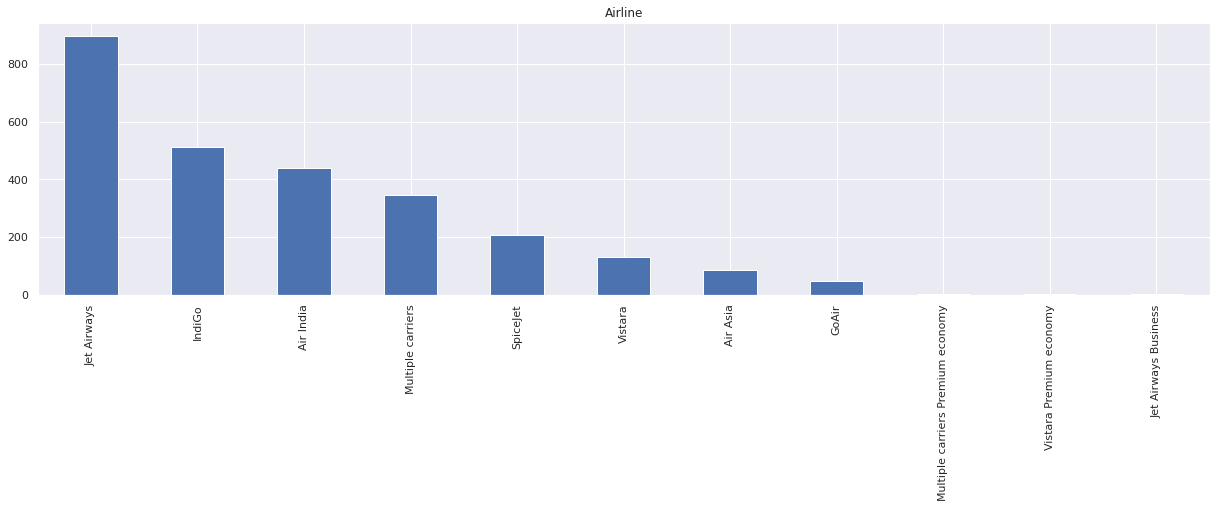

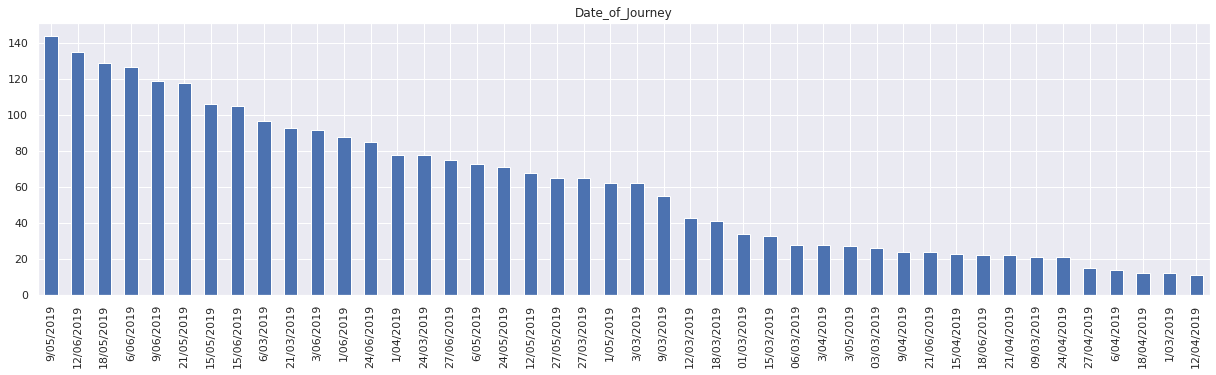

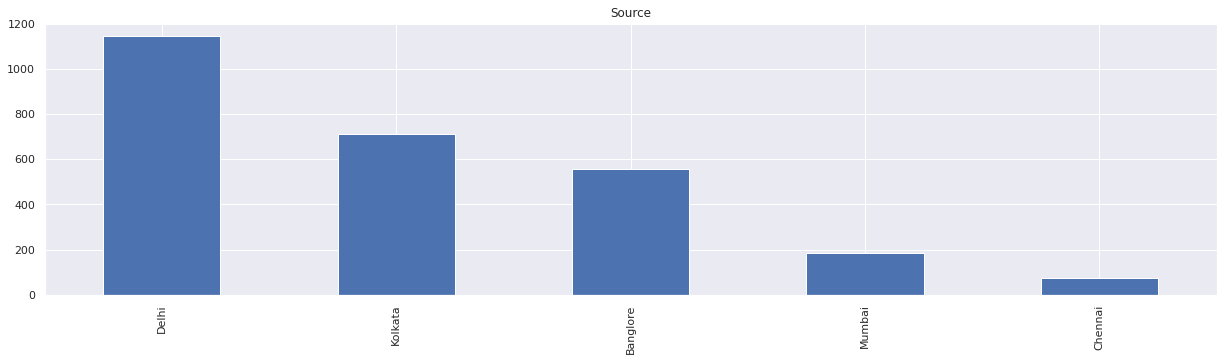

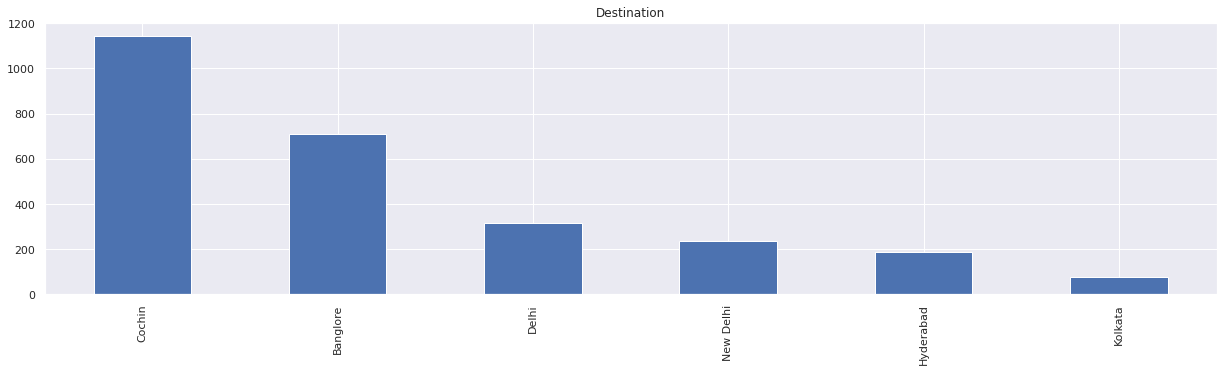

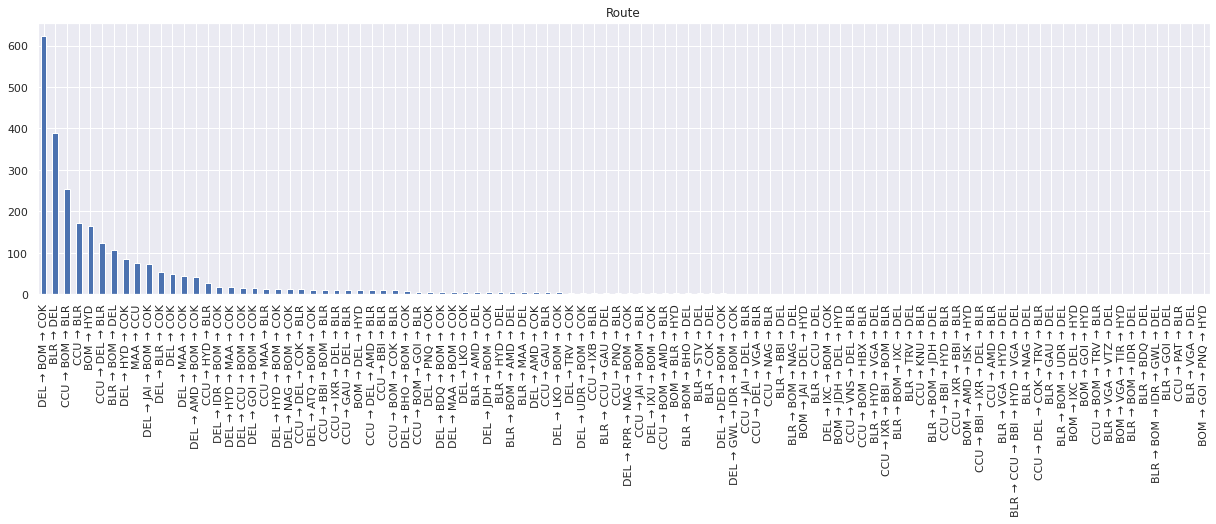

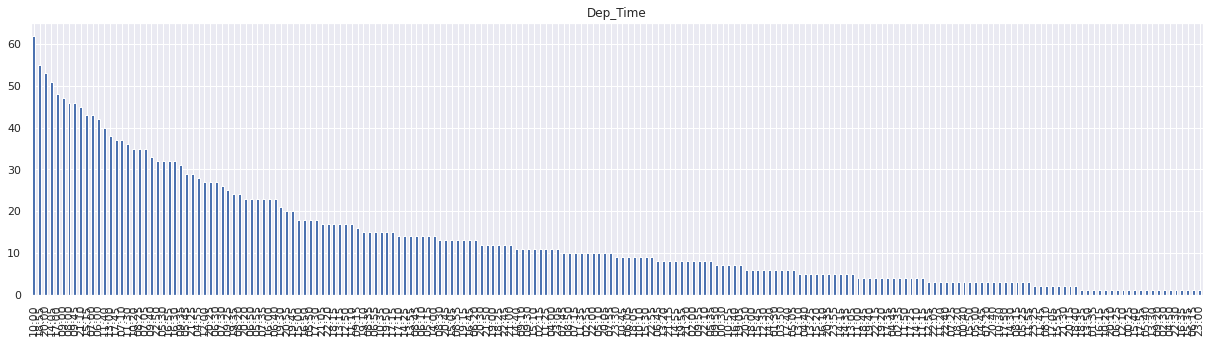

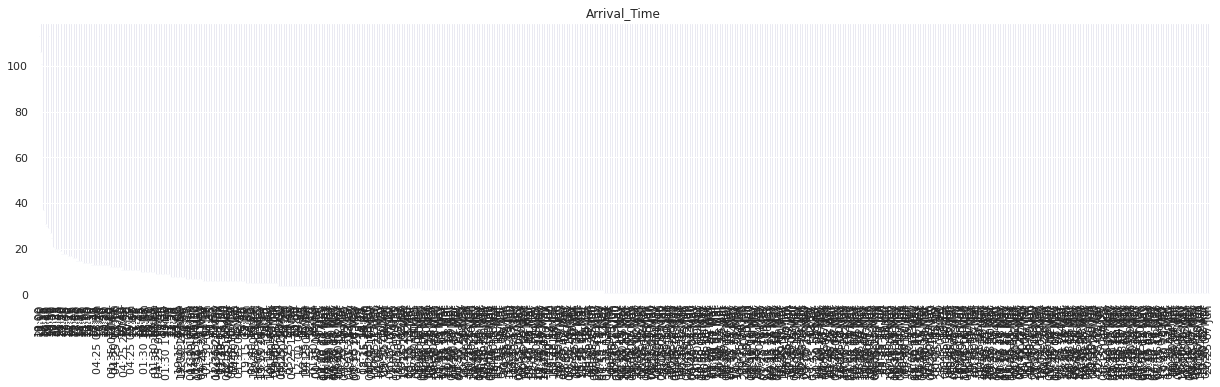

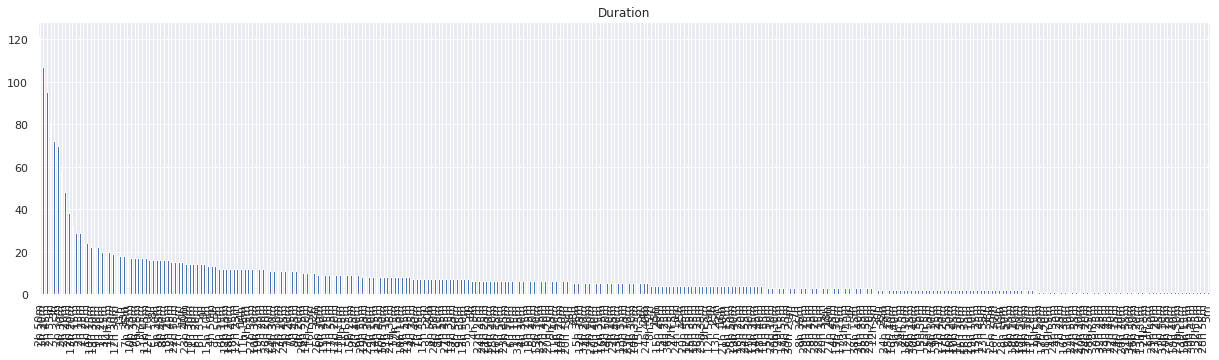

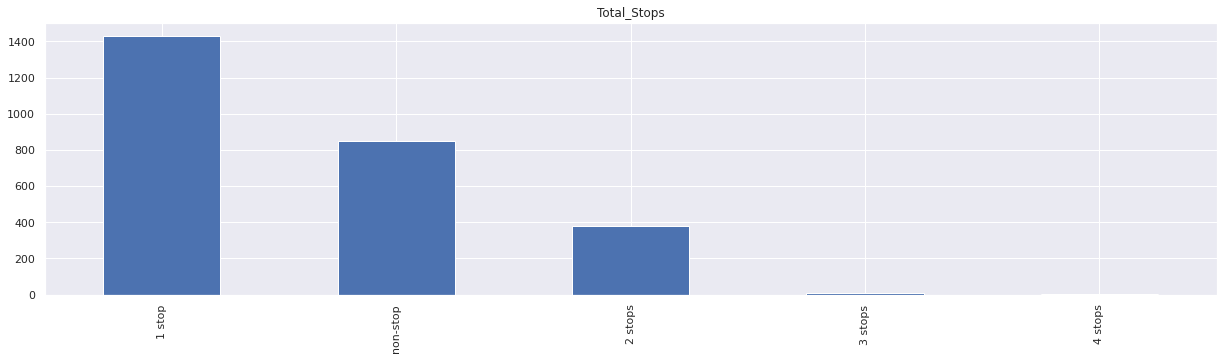

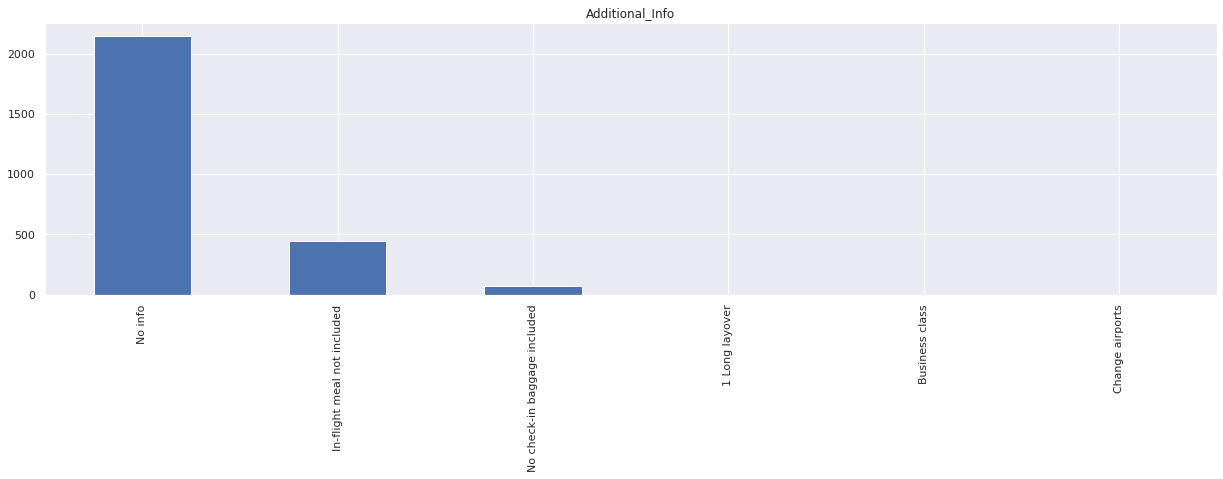

In [ ]:
#inivariate analyis
#Selecting tge categorical columns
categorical_col = test_data.select_dtypes(include=['object']).columns

#Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
  plt.figure(figsize=(21,5))
  plt.subplot(111)
  test_data[column].value_counts().plot(kind='bar')
  plt.title(column)

In [9]:
#Airline column is nominal categorical data and there is less cardinality, so we will perform One Hot Encoding.

train_data["Airline"].value_counts()

Airline = train_data[["Airline"]]



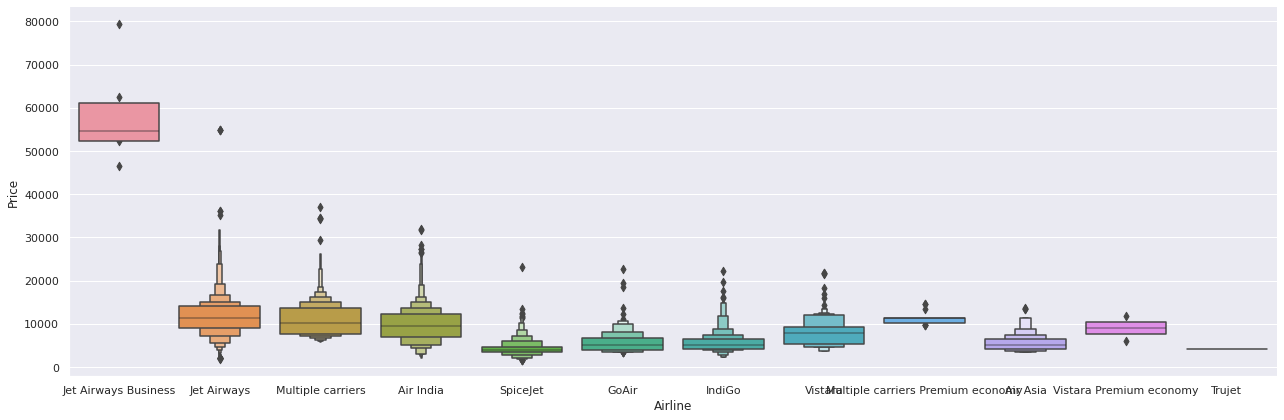

In [10]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [11]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [12]:
#Airline column is nominal categorical data and there is less cardinality, so we will perform One Hot Encoding.

Airline_test = test_data[["Airline"]]
Airline_test = pd.get_dummies(Airline_test,drop_first=True)

In [13]:
#we derived new features using Date_of_journy

train_data["Day_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"],format ="%d/%m/%Y").dt.day
train_data["month_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"],format ="%d/%m/%Y").dt.month

test_data["Day_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"],format ="%d/%m/%Y").dt.day
test_data["month_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"],format ="%d/%m/%Y").dt.month

#drop Date_of_Journey
train_data.drop(["Date_of_Journey"],axis =1 , inplace = True)

test_data.drop(["Date_of_Journey"],axis =1 , inplace = True)


In [14]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute


#drop Dep_time
train_data.drop(["Dep_Time"],axis =1 , inplace = True)

test_data.drop(["Dep_Time"],axis =1 , inplace = True)


In [15]:
#arrival time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

#drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"],axis =1 , inplace = True)

test_data.drop(["Arrival_Time"],axis =1 , inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [16]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [17]:
#assigning and converting Duration column into list
duration = list(train_data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2 :
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"
    else:
      duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0])) # Extract hours from duration
  duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1])) # Extract minutes from duration

In [18]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.drop(["Duration"], axis = 1 , inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
#assigning and converting Duration column into list
duration_test = list(test_data["Duration"])
for i in range(len(duration_test)):
  if len(duration_test[i].split()) != 2 :
    if "h" in duration_test[i]:
      duration_test[i] = duration_test[i].strip() + " 0m"
    else:
      duration_test[i] = "0h " + duration_test[i]

duration_hours_test = []
duration_mins_test = []
for i in range(len(duration_test)):
  duration_hours_test.append(int(duration_test[i].split(sep="h")[0])) # Extract hours from duration
  duration_mins_test.append(int(duration_test[i].split(sep="m")[0].split()[-1])) # Extract minutes from duration

In [21]:
test_data["Duration_hours"] = duration_hours_test
test_data["Duration_mins"] = duration_mins_test

test_data.drop(["Duration"], axis = 1 , inplace = True)

In [22]:
#As Source is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.

Source =  train_data[["Source"]]

Source = pd.get_dummies(Source,drop_first = True) # test drop_first = False Later

Source.head(10)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,1,0,0


In [23]:
Source_test =  test_data[["Source"]]

Source_test = pd.get_dummies(Source_test,drop_first = True) # test drop_first = False Later

Source_test.head(10)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
5,0,1,0,0
6,0,0,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [24]:
#As Destination is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first = True) # test drop_first = False Later

Destination.head(10)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [25]:
#As Destination is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.

Destination_test = train_data[["Destination"]]
Destination_test = pd.get_dummies(Destination_test,drop_first = True) # test drop_first = False Later

Destination_test.head(10)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [26]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other. so we will drop both the column.

train_data.drop(["Route","Additional_Info"],axis = 1 , inplace = True)

In [27]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other. so we will drop both the column.

test_data.drop(["Route","Additional_Info"],axis = 1 , inplace = True)

In [28]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
#In this is case of Ordinal Categorical type we perform Label Encoder.Values are assigned with corresponding keys.

train_data.replace({"non-stop":0 ,"1 stop":1,"2 stops": 2 ,"3 stops": 3 , "4 stops":4},inplace=True)

In [31]:
#In this is case of Ordinal Categorical type we perform Label Encoder.Values are assigned with corresponding keys.

test_data.replace({"non-stop":0 ,"1 stop":1,"2 stops": 2 ,"3 stops": 3 , "4 stops":4},inplace=True)

In [32]:
#Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data , Airline ,Source , Destination],axis = 1)

In [33]:
#Concatenate dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([test_data , Airline_test ,Source_test , Destination_test],axis = 1)

In [34]:
data_train.drop(["Airline","Source","Destination"],axis = 1 , inplace = True)

In [35]:
data_test.drop(["Airline","Source","Destination"],axis = 1 , inplace = True)

In [36]:
data_train.head(10)

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0
6,1,11087,12,3,18,55,10,25,15,30,...,0,0,0,0,0,0,0,0,0,1
7,1,22270,1,3,8,0,5,5,21,5,...,0,0,0,0,0,0,0,0,0,1
8,1,11087,12,3,8,55,10,25,25,30,...,0,0,0,0,0,0,0,0,0,1
9,1,8625,27,5,11,25,19,15,7,50,...,0,0,1,0,0,1,0,0,0,0


In [37]:
data_test.head(10)

,Total_Stops,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
5,1.0,12.0,6.0,18.0,15.0,12.0,35.0,18.0,20.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
6,1.0,12.0,3.0,7.0,30.0,22.0,35.0,15.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
7,1.0,1.0,5.0,15.0,15.0,20.0,30.0,5.0,15.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
8,0.0,15.0,3.0,10.0,10.0,12.0,55.0,2.0,45.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
9,1.0,18.0,5.0,16.0,30.0,22.0,35.0,6.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0


In [38]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

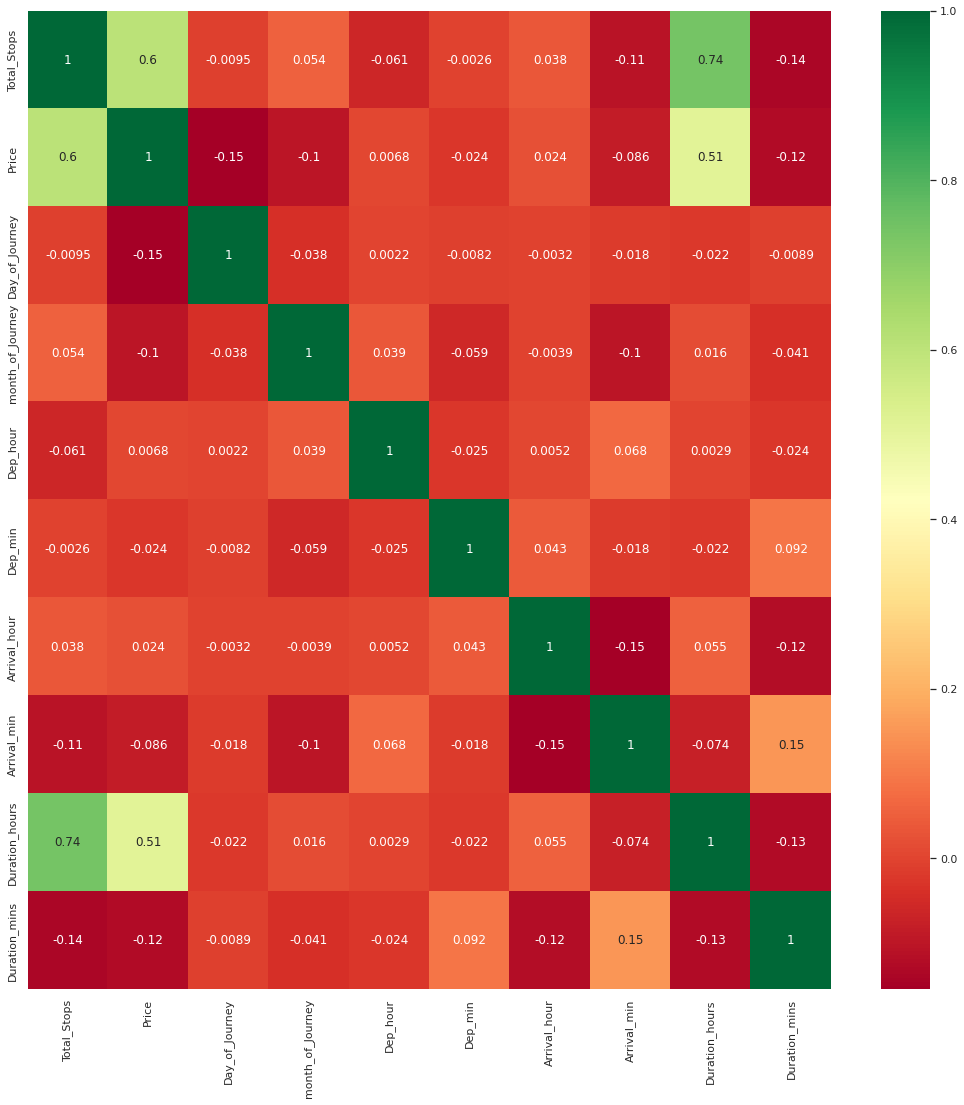

In [39]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot = True , cmap="RdYlGn")

plt.show()

In [40]:
np.any(np.isnan(data_train.isnull().sum()))

False

In [41]:
data_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Day_of_Journey                               0
month_of_Journey                             0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [42]:
X = data_train.loc[:, ['Total_Stops', 'Day_of_Journey', 'month_of_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[2.51809460e-01 1.44113574e-01 5.32151114e-02 2.42731327e-02
 2.15561794e-02 2.74050383e-02 2.00085729e-02 1.03084219e-01
 1.75222162e-02 1.03248831e-02 1.74844954e-03 1.72563575e-02
 1.34506970e-01 6.74280345e-02 1.89616993e-02 8.86113082e-04
 2.61895967e-03 9.85005636e-05 5.34061050e-03 8.87376696e-05
 4.79496332e-04 1.11244355e-02 2.92784404e-03 6.20693036e-03
 1.27285449e-02 1.25725241e-02 6.56280080e-03 4.40104227e-04
 2.47105005e-02]


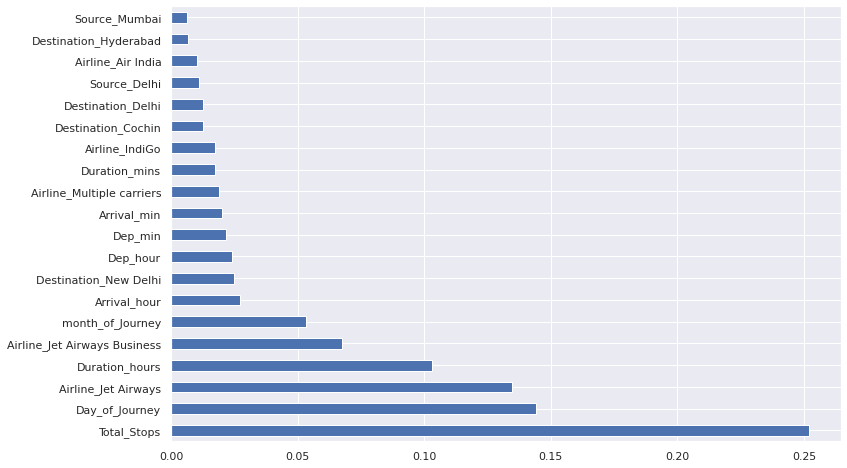

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split (X,y,test_size = 0.2 , random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_pred = reg_rf.predict(X_test)

In [49]:
reg_rf.score(X_train,y_train)

0.9530472278038865

In [50]:
reg_rf.score(X_test,y_test)

0.7972437897977078

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


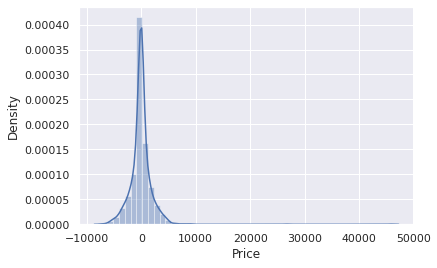

In [51]:
sns.distplot(y_test-y_pred)
plt.show()

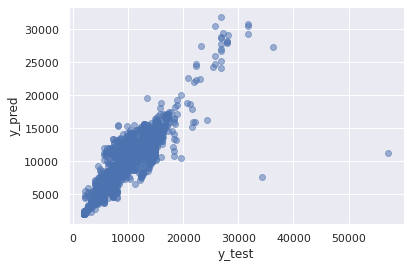

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



MAE: 1178.504907519442
MSE: 4371840.824455409
RMSE: 2090.894742557695


In [54]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [55]:
metrics.r2_score(y_test, y_pred)

0.7972437897977078